In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# plot decsion regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx2.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=[colors[idx]], marker=markers[idx], label=cl)



In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

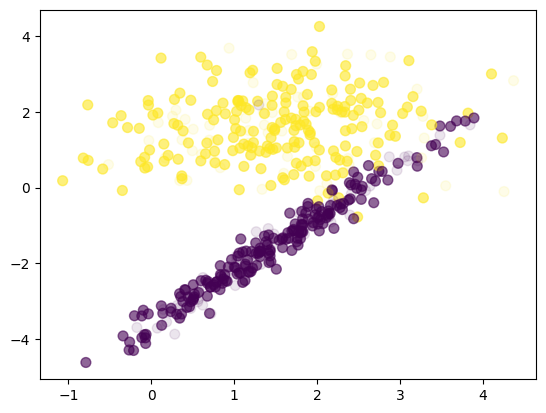

In [5]:
X, y = make_classification(n_samples=500, n_classes=2, n_clusters_per_class=1, n_features=2, n_informative=2, n_redundant=0, class_sep=1.5, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, alpha=0.1)
plt.show()

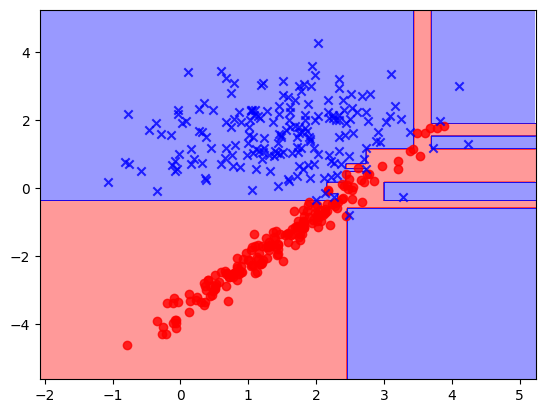

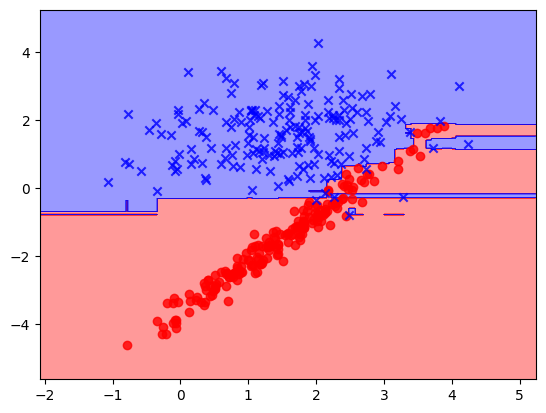

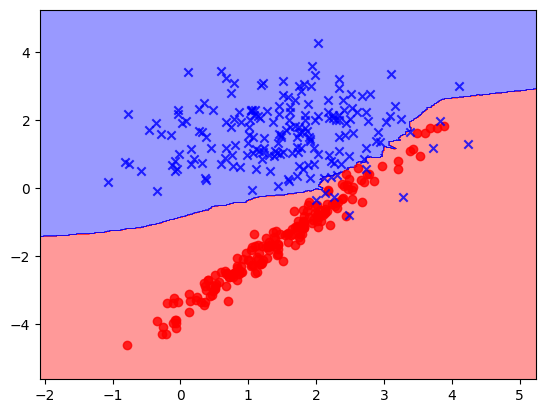

In [33]:
dt = DecisionTreeClassifier(random_state=1, max_depth=10)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=1, n_estimators=10)
rf.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=10, p=2)
knn.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, dt)
plt.show()

plot_decision_regions(X_train, y_train, rf)
plt.show()

plot_decision_regions(X_train, y_train, knn)
plt.show()

In [34]:
y_pred = knn.predict(X_test)
print('Test score: {:.2f}'.format(knn.score(X_test, y_test)))

Test score: 0.94
